# DataSet - Ecomerce
### O dataset "E-Commerce Data" contém registros de transações realizadas entre 01/12/2010 e 09/12/2011 por uma empresa de varejo online sem loja física, sediada no Reino Unido

### Principais características
Período: Dezembro de 2010 a dezembro de 2011

* **Localização**: Reino Unido, com vendas internas e para outros países
* **Transações**: Inclui detalhes como número da fatura, código e descrição do produto, quantidade, data, preço unitário, ID do cliente e país
* **Volume**: Mais de 500.000 registros


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [14]:
df = pd.read_csv('ecommerce-data.csv', encoding='ISO-8859-1')

In [15]:
# Conversão de data e criação de coluna de receita
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
# Visualização das colunas
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice']


In [18]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

<Axes: title={'center': 'Número de Vendas por País'}, xlabel='Country'>

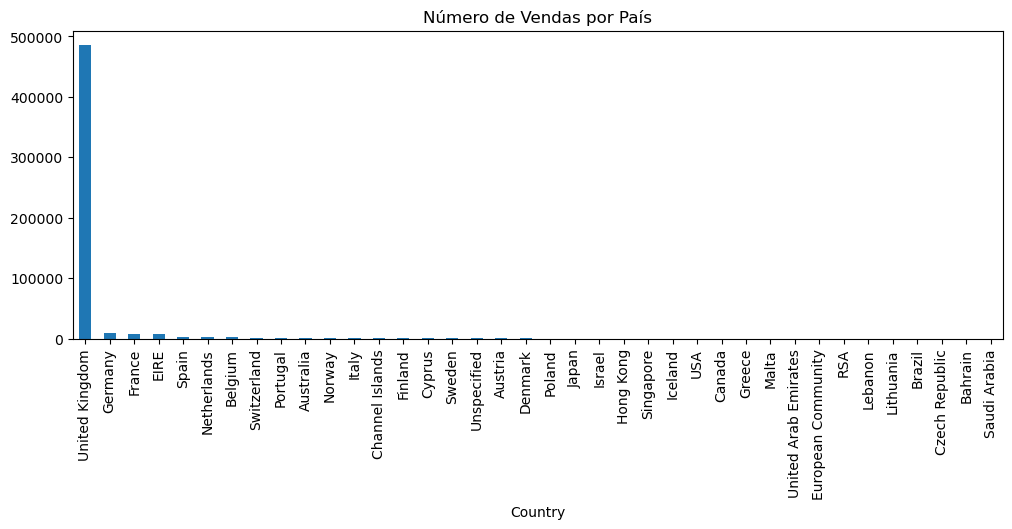

In [19]:
#Distribuicao por país
df['Country'].value_counts().plot(kind='bar', figsize=(12, 4), title='Número de Vendas por País')

In [20]:
# Produtos mais vendidos
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

In [22]:
# Numero de pedidos por cliente
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)


CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [64]:
# Ticket médio por cliente
ticket_medio = df.groupby('CustomerID')['TotalPrice'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()
ticket_medio.sort_values(ascending=False).head(10)


,0
CustomerID,
16446.0,84236.250000
12346.0,77183.600000
15749.0,14844.766667
15098.0,13305.500000
12357.0,6207.670000
12415.0,5948.310952
12590.0,4932.130000
12688.0,4873.810000
12752.0,4366.780000


Text(0.5, 1.0, 'Boxplot do Valor Total por Transação')

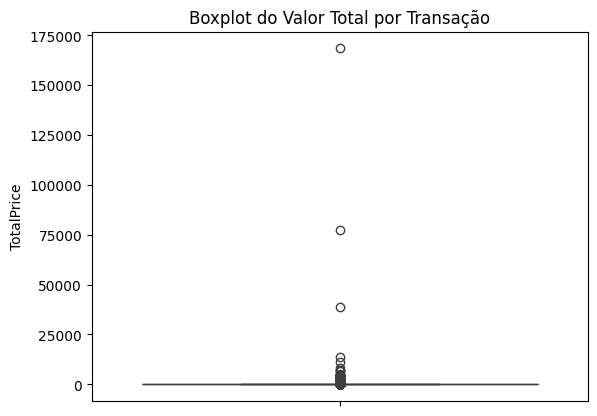

In [65]:
# Análise de outliers (total Price)
sns.boxplot(data=df, y='TotalPrice')
plt.title('Boxplot do Valor Total por Transação')



## Limpeza dos dados

In [66]:
# Valores ausentes
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132220
Country,0
TotalPrice,0


In [67]:
#Notas de crédito / devoluções
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


In [68]:
# Remover Linhas
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [69]:
# Removendo Precos ou quantidades negativas ou zero
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [70]:
# Removendo duplicatas
df.duplicated().sum()

np.int64(5226)

In [71]:
df = df.drop_duplicates()

In [72]:
# Verificar dados ausentes
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132186
Country,0
TotalPrice,0


<ipython-input-73-1834570965>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['TotalPrice'].resample('M').sum().plot(figsize=(12, 6), title='Receita Mensal Total')


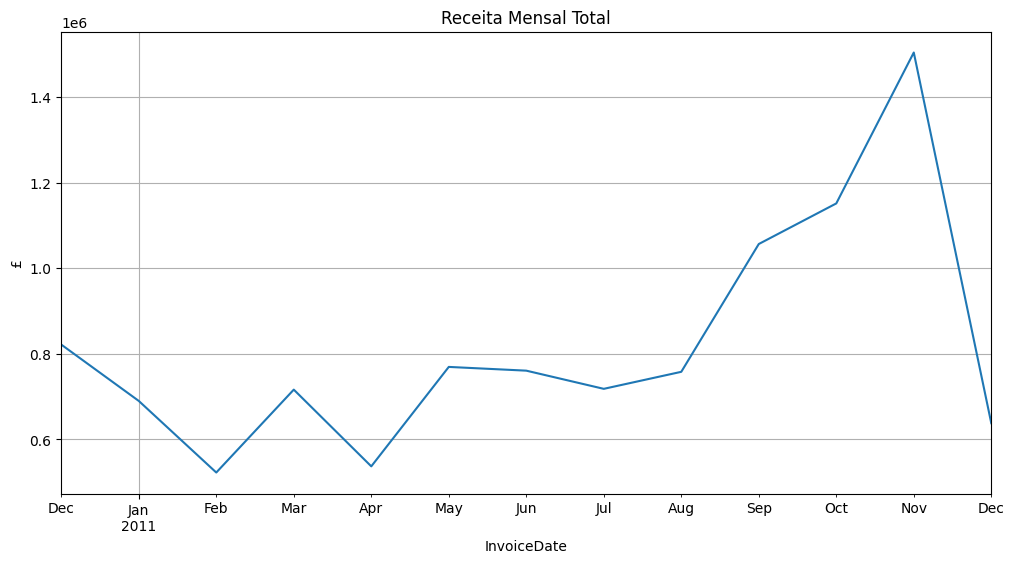

In [73]:
# Receita ao longo do tempo
df.set_index('InvoiceDate', inplace=True)
df['TotalPrice'].resample('M').sum().plot(figsize=(12, 6), title='Receita Mensal Total')
plt.ylabel('£')
plt.grid(True)
plt.show()

# Restaurar InvoiceDate como coluna para próximos passos
df.reset_index(inplace=True)

##  Conclusões da Análise Exploratória
- O dataset apresenta transações de e-commerce com boa granularidade para análises de clientes, produtos e países.
- A maior parte das vendas ocorre no Reino Unido, com alguns outros países contribuindo com menor volume de receita.
- Os produtos com maior faturamento nem sempre são os mais vendidos em quantidade — preço e volume impactam diretamente.
- As receitas mensais ajudam a identificar tendências, picos de sazonalidade e oportunidades para ações comerciais.
- A limpeza de dados foi essencial para remover devoluções, transações inválidas e garantir consistência nas análises.


# Análise de comportamento

## Comportamento de recompra por cliente (lealdade)

In [74]:
# Número de compras por cliente
compras_por_cliente = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Clientes com mais de 1 compra
clientes_fieis = compras_por_cliente[compras_por_cliente > 1]

print(f"Total de clientes únicos: {df['CustomerID'].nunique()}")
print(f"Clientes com mais de uma compra: {len(clientes_fieis)}")

Total de clientes únicos: 4338
Clientes com mais de uma compra: 2845


<Axes: title={'center': 'Distribuição de Compras por Cliente'}, xlabel='InvoiceNo'>

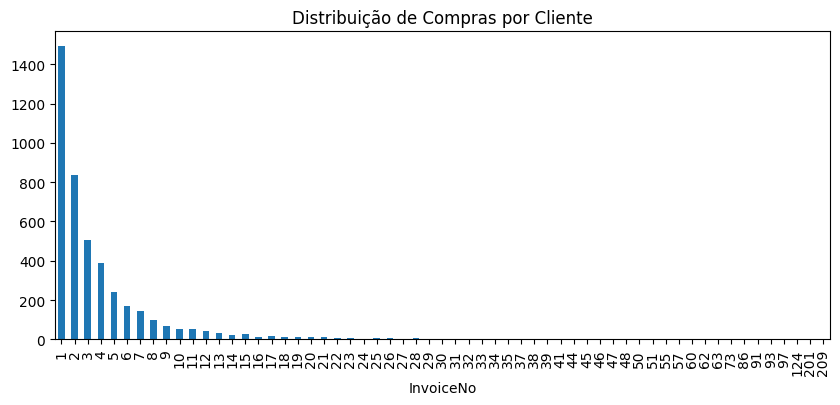

In [75]:
#Visualização
compras_por_cliente.value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title='Distribuição de Compras por Cliente')

# Modelagem de Classificação

## Análise de Sazonalidade

<Figure size 1400x600 with 0 Axes>

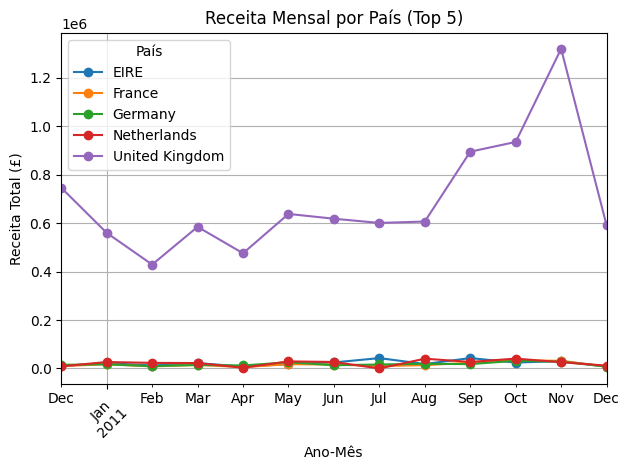

In [79]:
# Selecionar os 5 países com maior receita
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(5).index

# Filtrar a base para os top países
df_top = df[df['Country'].isin(top_countries)]

# Agrupar receita mensal por país
monthly_revenue = df_top.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack().fillna(0)

# Plotar gráfico de linha
plt.figure(figsize=(14, 6))
monthly_revenue.plot(marker='o')
plt.title('Receita Mensal por País (Top 5)')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita Total (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="País")
plt.show()

## Curva ABC


*   A: ~80% da receita (os "queridinhos")
*   B: ~15%
*   C: ~5%



In [80]:
# Receita total por produto
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Calcular participação acumulada
product_revenue['cumulative_pct'] = product_revenue['TotalPrice'].cumsum() / product_revenue['TotalPrice'].sum()

# Classificação ABC
def classifica_abc(pct):
    if pct <= 0.80:
        return 'A'
    elif pct <= 0.95:
        return 'B'
    else:
        return 'C'

product_revenue['Classificacao'] = product_revenue['cumulative_pct'].apply(classifica_abc)

# Exibir top 10
product_revenue.head(10)

,Description,TotalPrice,cumulative_pct,Classificacao
0,DOTCOM POSTAGE,206248.77,0.019380,A
1,REGENCY CAKESTAND 3 TIER,174156.54,0.035745,A
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60,0.051576,A
3,WHITE HANGING HEART T-LIGHT HOLDER,106236.72,0.061558,A
4,PARTY BUNTING,99445.23,0.070903,A
5,JUMBO BAG RED RETROSPOT,94159.81,0.079751,A
6,MEDIUM CERAMIC TOP STORAGE JAR,81700.92,0.087428,A
7,POSTAGE,78101.88,0.094767,A
8,Manual,77752.82,0.102073,A
9,RABBIT NIGHT LIGHT,66870.03,0.108357,A


## Análise por Dia da Semana

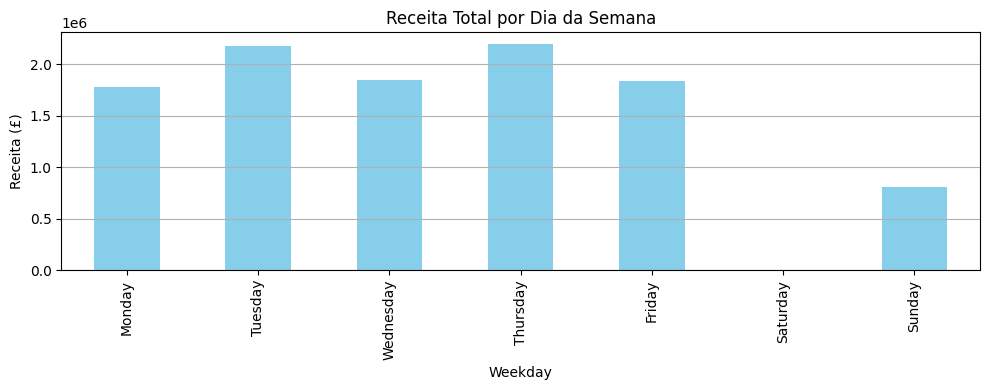

In [81]:
# Criar coluna com dia da semana
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Receita por dia da semana
weekday_revenue = df.groupby('Weekday')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gráfico
plt.figure(figsize=(10, 4))
weekday_revenue.plot(kind='bar', color='skyblue')
plt.title('Receita Total por Dia da Semana')
plt.ylabel('Receita (£)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Clusterização de Países com KMeans

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [83]:
# Agrupar dados por país
country_stats = df.groupby('Country').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'TotalPrice': 'ReceitaTotal',
    'InvoiceNo': 'NumPedidos',
    'Quantity': 'QtdTotalVendida'
}).reset_index()

# Calcular ticket médio
country_stats['TicketMedio'] = country_stats['ReceitaTotal'] / country_stats['NumPedidos']

# Selecionar as features
features = country_stats[['ReceitaTotal', 'NumPedidos', 'QtdTotalVendida', 'TicketMedio']]

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar KMeans (com 3 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_stats['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizar os dados com cluster
country_stats.head()

,Country,ReceitaTotal,NumPedidos,QtdTotalVendida,TicketMedio,Cluster
0,Australia,138453.81,57,83891,2429.014211,2
1,Austria,10198.68,17,4881,599.922353,0
2,Bahrain,754.14,3,314,251.380000,0
3,Belgium,41196.34,98,23237,420.370816,0
4,Brazil,1143.60,1,356,1143.600000,0


## Gráfico dos Clusters de Países

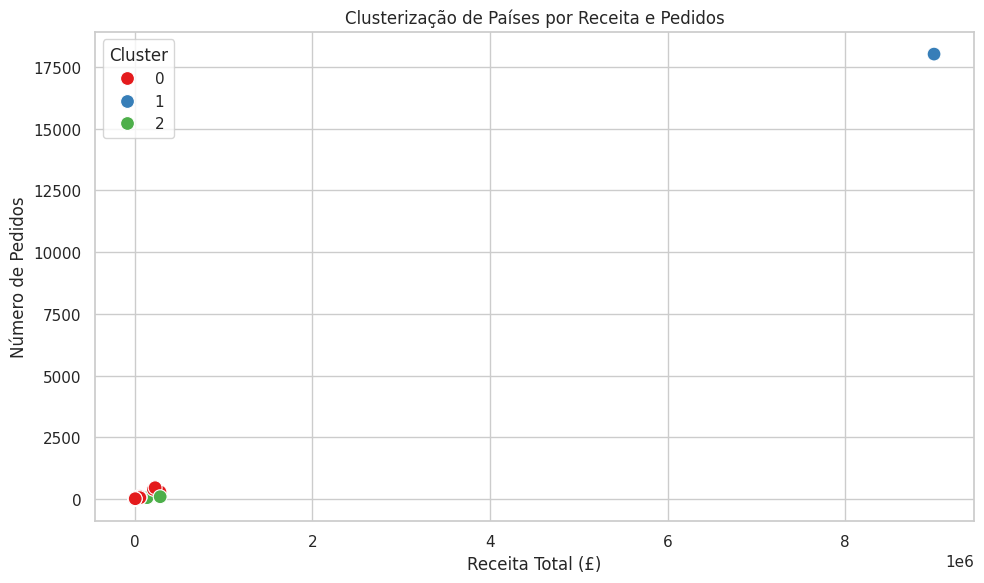

In [84]:
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Gráfico de dispersão com clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats,
    x='ReceitaTotal',
    y='NumPedidos',
    hue='Cluster',
    palette='Set1',
    s=100
)

plt.title('Clusterização de Países por Receita e Pedidos')
plt.xlabel('Receita Total (£)')
plt.ylabel('Número de Pedidos')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Estratégia sugerida a partir dos clusters:

Análise de Cluster de Países para Expansão de Mercado
Com base na clusterização dos países a partir de variáveis como Receita Total, Número de Pedidos, Volume Vendido e Ticket Médio, foram identificados três perfis distintos de mercado:

🔵 Cluster 1 — Mercado Dominante (Reino Unido)
Representado por um único país com receita e volume de pedidos muito superiores aos demais.

Este cluster concentra mais de £8 milhões em receita e cerca de 18 mil pedidos.

Conclusão: O Reino Unido é o principal motor de vendas e pode servir como referência para estratégias de sucesso. Suas práticas podem ser replicadas em países com perfil semelhante.

🟢 Cluster 2 — Mercados de Crescimento Moderado
Inclui países com desempenho consistente, embora abaixo do líder.

Receita e volume razoáveis indicam potencial para expansão, principalmente com ações localizadas.

Conclusão: Esses países devem ser priorizados em planos de crescimento. Adoção de campanhas de marketing específicas ou melhoria na logística local pode gerar impacto positivo.

🔴 Cluster 0 — Mercados Emergentes ou Inativos
Engloba países com baixa penetração: poucos pedidos e receita muito limitada.

Alguns países nesse grupo podem ainda estar em fase de exploração ou enfrentam barreiras logísticas, culturais ou fiscais.

Conclusão: A expansão nesses mercados deve ser feita com cautela. Sugere-se testar modelos mais enxutos (marketplaces, parceiros locais) antes de maiores investimentos.


##  Recomendação Final

A análise de cluster mostrou-se eficaz para segmentar mercados com base em comportamento de compra real. Recomenda-se focar:

Manutenção e otimização no Reino Unido (Cluster 1)

Investimento progressivo nos países do Cluster 2

Monitoramento estratégico e ações piloto nos países do Cluster 0